In [2]:
import pandas as pd
from lib.lib import *
from sklearn.model_selection import train_test_split

In [3]:
simulated_data = pd.read_excel(f'data/CNT_Growth_Rate_Simulation_with_noise.xlsx')
simulated_data.head()

,Experiment Number,"Temperature (Tp, °C)","Time (t, s)","Catalyst Thickness (d, nm)",CNT-G (micrometers/s)
0,1,600,0,0.6,0.000000
1,1,600,1,0.6,0.028338
2,1,600,2,0.6,0.076081
3,1,600,3,0.6,0.114440
4,1,600,4,0.6,0.157956


In [4]:
original_data = pd.read_csv('data/CNTGrowthData.csv')
original_data.head()
original_data.rename(columns={
    'Run_ID': 'Experiment Number',
    'Temperature ( in C )': 'Temperature (Tp, °C)',
    'Catalyst Layer Thickness ( in nm )': 'Catalyst Thickness (d, nm)',
    'Time_s': 'Time (t, s)',
    'growth_rate': 'CNT-G (micrometers/s)'
}, inplace=True)
original_data = original_data[list(simulated_data.columns)]
original_data["Experiment Number"] = original_data["Experiment Number"] + max(simulated_data["Experiment Number"])
original_data.head()

,Experiment Number,"Temperature (Tp, °C)","Time (t, s)","Catalyst Thickness (d, nm)",CNT-G (micrometers/s)
0,137,625,132,2,4.520099
1,137,625,134,2,4.490667
2,137,625,136,2,4.503352
3,137,625,138,2,4.573735
4,137,625,140,2,6.329410


In [5]:
simulated_data.describe()

,Experiment Number,"Temperature (Tp, °C)","Time (t, s)","Catalyst Thickness (d, nm)",CNT-G (micrometers/s)
count,163336.000000,163336.000000,163336.000000,163336.000000,163336.000000
mean,68.500000,800.000000,600.000000,1.300000,21.105942
std,39.258877,122.474862,346.699778,0.458259,13.560843
min,1.000000,600.000000,0.000000,0.600000,0.000000
25%,34.750000,700.000000,300.000000,0.950000,9.409286
50%,68.500000,800.000000,600.000000,1.300000,18.133358
75%,102.250000,900.000000,900.000000,1.650000,31.100267
max,136.000000,1000.000000,1200.000000,2.000000,68.093337


In [6]:
original_data.describe()

,Experiment Number,"Temperature (Tp, °C)","Time (t, s)","Catalyst Thickness (d, nm)",CNT-G (micrometers/s)
count,4466.000000,4466.0,4466.000000,4466.0,4466.000000
mean,137.708464,625.0,1390.910434,2.0,4.249485
std,0.763445,0.0,795.962729,0.0,0.450925
min,137.000000,625.0,94.000000,2.0,0.000000
25%,137.000000,625.0,734.500000,2.0,4.033500
50%,138.000000,625.0,1293.000000,2.0,4.250500
75%,138.000000,625.0,1938.000000,2.0,4.489000
max,139.000000,625.0,3250.000000,2.0,6.329410


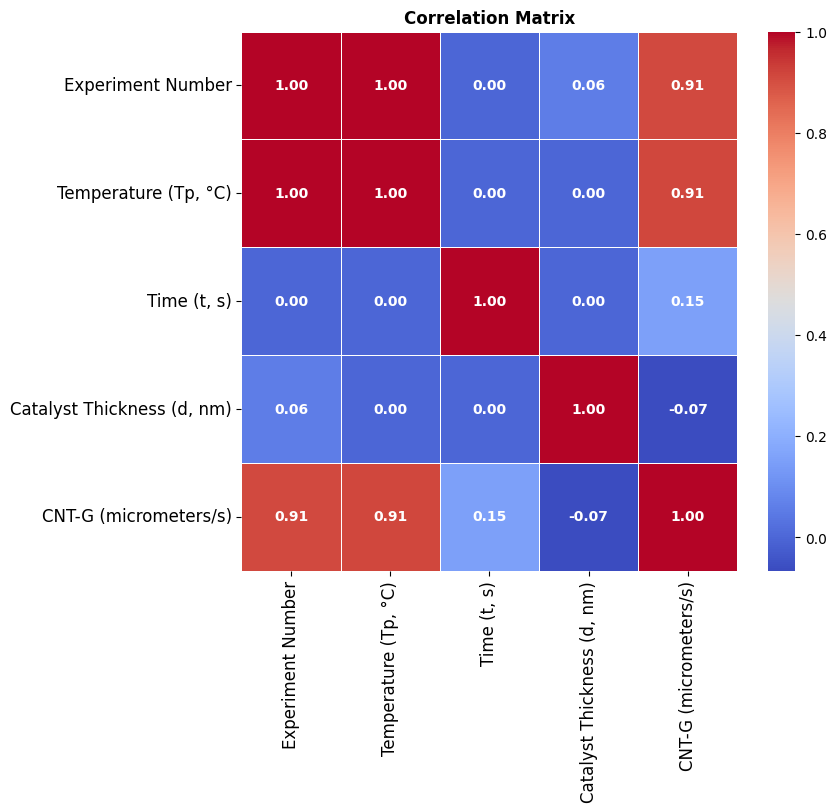

In [7]:
get_data_correlation(simulated_data)

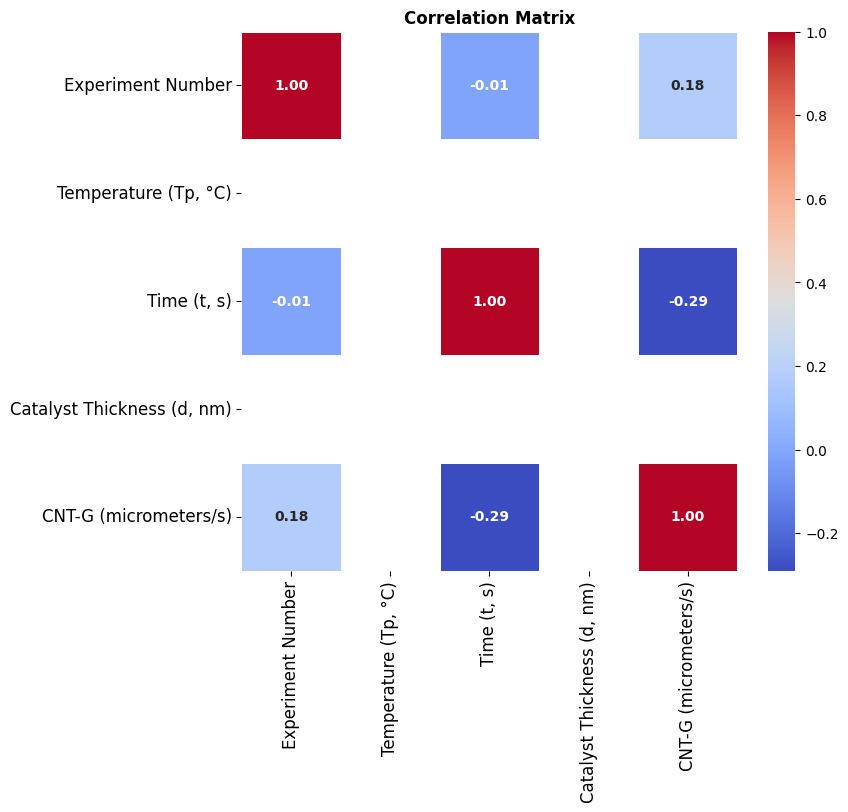

In [8]:
get_data_correlation(original_data)

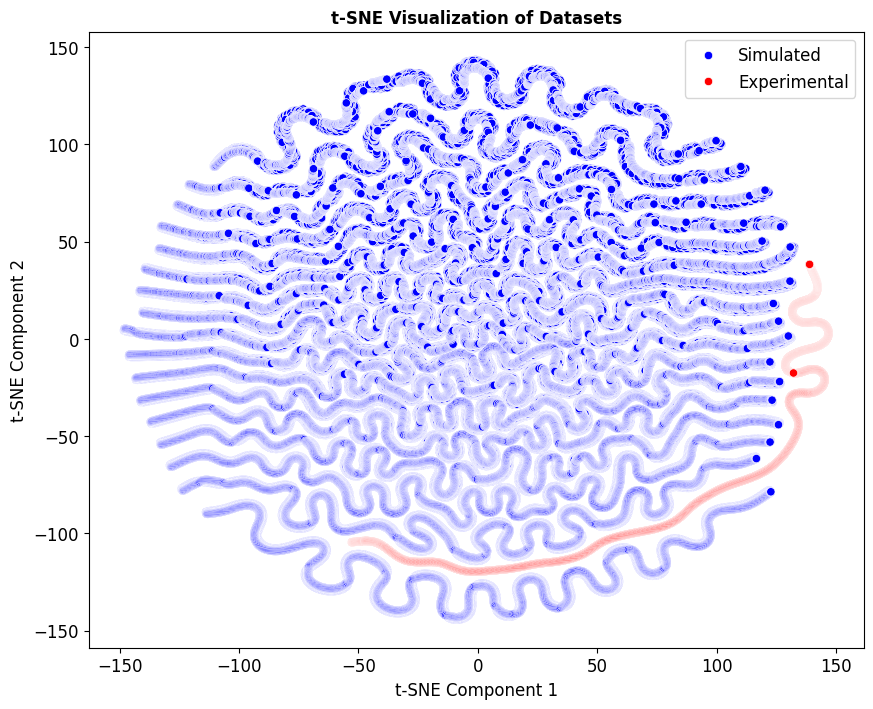

,t-SNE1,t-SNE2,Dataset
0,-113.809998,-88.990730,Simulated
1,-113.742577,-88.951530,Simulated
2,-113.640045,-88.889343,Simulated
3,-113.462822,-88.812439,Simulated
4,-113.194031,-88.716728,Simulated
...,...,...,...
167797,132.787598,-17.598135,Experimental
167798,132.610352,-17.589334,Experimental
167799,132.443558,-17.572706,Experimental
167800,132.281754,-17.548609,Experimental


In [11]:
TSNE_viz(simulated_data, original_data, data_zone=False)